In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.iloc[:, 1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


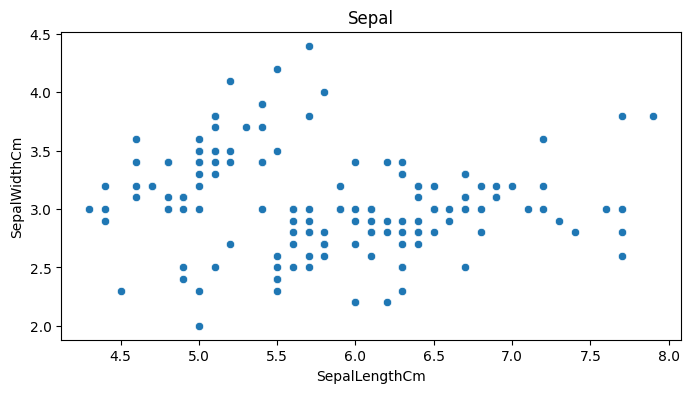

In [4]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['SepalLengthCm'], y=X['SepalWidthCm'])
plt.title('Sepal')
plt.show()

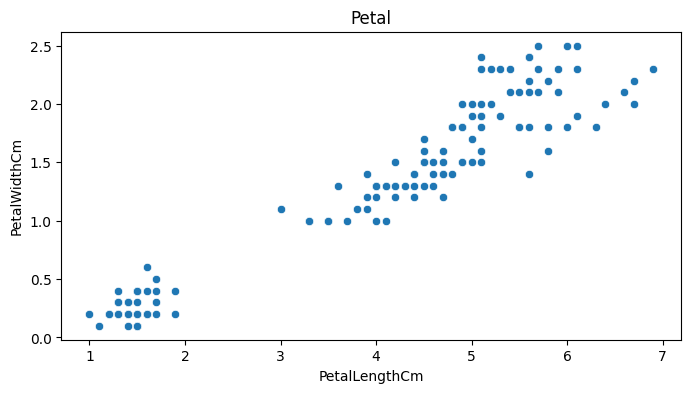

In [5]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['PetalLengthCm'], y=X['PetalWidthCm'])
plt.title('Petal')
plt.show()

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    df[f'cluster{i}'] = km.labels_

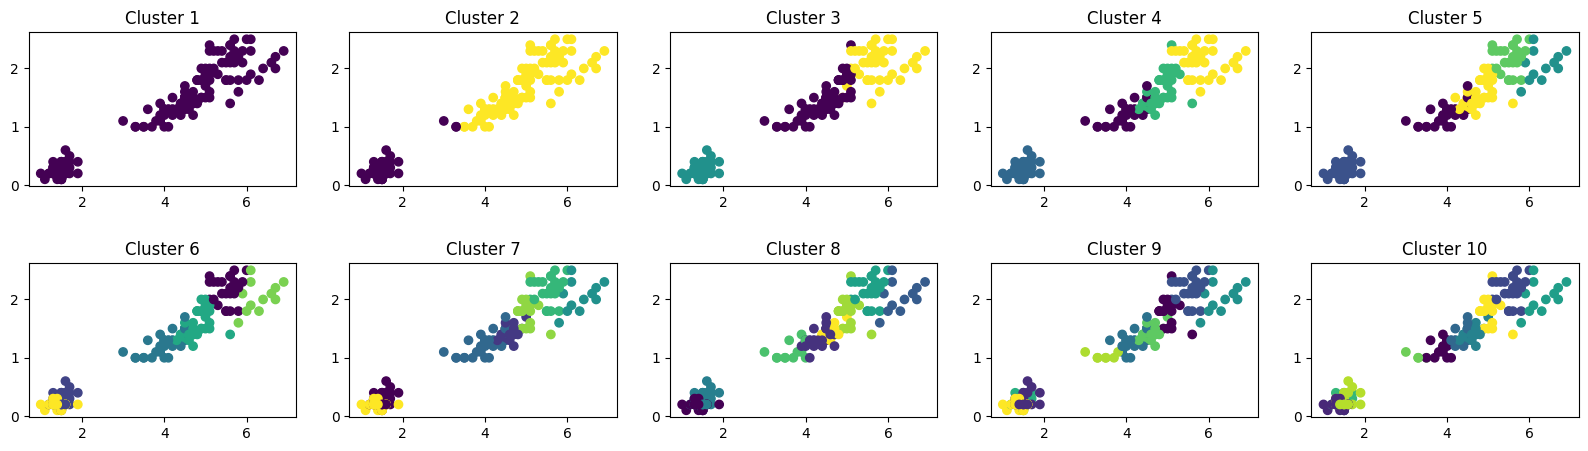

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x=X['PetalLengthCm'], y=X['PetalWidthCm'], c = df[f'cluster{i}'])
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i}')

Text(0, 0.5, 'Inertia')

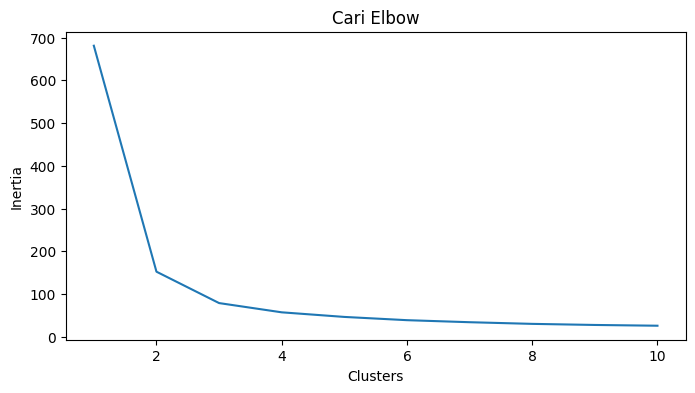

In [9]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [10]:
# membuat objek KMeans
km4 = KMeans(n_clusters=4).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km4.labels_

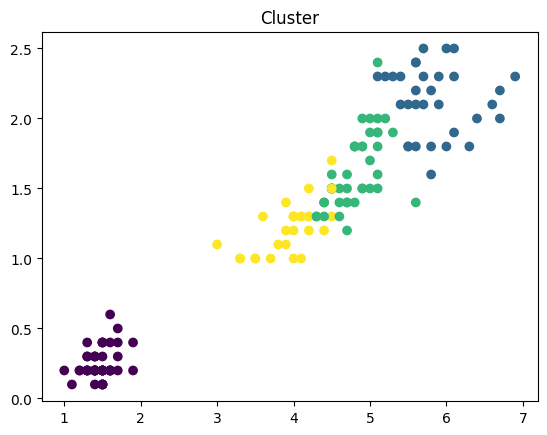

In [11]:
# Membuat scatter plot
plt.scatter(x=X['PetalLengthCm'], y=X['PetalWidthCm'], c=X['Labels'])
# Menambahkan judul
plt.title('Cluster')
# Menampilkan plot
plt.show()

In [12]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,1


In [13]:
X.to_csv('result.csv')